# k-Fold Cross Validation

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataSet = pd.read_csv('Social_Network_Ads.csv')
data_X = dataSet.iloc[:, :-1].values
data_Y = dataSet.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

## Training the Kernel SVM model on the Training set

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
classifier.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_Y = classifier.predict(test_X)
cm = confusion_matrix(test_Y, pred_Y)
print(cm)
accuracy_score(test_Y, pred_Y)

[[55  3]
 [ 1 21]]


0.95

## Applying k-Fold Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,X = train_X,y = train_Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.71 %
Standard Deviation: 4.78 %


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


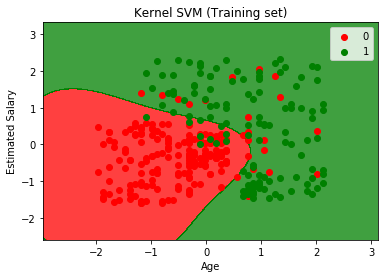

In [16]:
from matplotlib.colors import ListedColormap
set_X, set_Y = train_X, train_Y
X1, X2 = np.meshgrid(np.arange(start = set_X[:, 0].min() - 1, stop = set_X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = set_X[:, 1].min() - 1, stop = set_X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j, 0], set_X[set_Y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


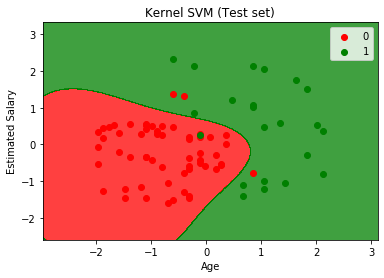

In [17]:
from matplotlib.colors import ListedColormap
set_X, set_Y = test_X, test_Y
X1, X2 = np.meshgrid(np.arange(start = set_X[:, 0].min() - 1, stop = set_X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = set_X[:, 1].min() - 1, stop = set_X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(set_Y)):
    plt.scatter(set_X[set_Y == j, 0], set_X[set_Y == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()